In [2]:
import pandas as pd
import numpy as np
import kagglehub
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Download latest version
path = kagglehub.dataset_download("adeagborapheal/exchange-rate-ngn-usd-from-2008-to-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/exchange-rate-ngn-usd-from-2008-to-2025


In [4]:
data = pd.read_csv('/kaggle/input/exchange-rate-ngn-usd-from-2008-to-2025/ObservationData_uxgmzwc.csv')

In [5]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,indicator,base-per,Unit,Date,Value
0,"Exchange Rates, National Currency per U.S. Dol...",Not Applicable,NaN,2008M1,117.98
1,"Exchange Rates, National Currency per U.S. Dol...",Not Applicable,NaN,2008M2,118.21
2,"Exchange Rates, National Currency per U.S. Dol...",Not Applicable,NaN,2008M3,117.92
3,"Exchange Rates, National Currency per U.S. Dol...",Not Applicable,NaN,2008M4,117.87
4,"Exchange Rates, National Currency per U.S. Dol...",Not Applicable,NaN,2008M5,117.83


In [6]:
# Extract Year and Month
data["Year"] = data["Date"].str.extract(r"(\d{4})")  # Extracts the 4-digit year
data["Month"] = data["Date"].str.extract(r"M(\d+)").astype(int)  # Extracts the month number as an integer

# Keep only required columns
data = data[["Year", "Month", "Value"]]

# Display the processed data
print(data.head())

   Year  Month   Value
0  2008      1  117.98
1  2008      2  118.21
2  2008      3  117.92
3  2008      4  117.87
4  2008      5  117.83


In [7]:
data.tail()

,Year,Month,Value
202,2024,11,1670.776429
203,2024,12,1553.729255
204,2025,1,1535.946177
205,2025,2,1500.921580
206,2025,3,1526.369420


In [25]:
!pip install tbats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.2 MB/s eta 0:00:00:00:01


In [8]:
# Convert to a standard datetime format
data["Date"] = pd.to_datetime(data["Year"].astype(str) + "-" + data["Month"].astype(str) + "-01")

# Keep necessary columns
data = data[["Date", "Value", "Year", "Month"]]

print(data.head())

        Date   Value  Year  Month
0 2008-01-01  117.98  2008      1
1 2008-02-01  118.21  2008      2
2 2008-03-01  117.92  2008      3
3 2008-04-01  117.87  2008      4
4 2008-05-01  117.83  2008      5


In [9]:
data.tail()

,Date,Value,Year,Month
202,2024-11-01,1670.776429,2024,11
203,2024-12-01,1553.729255,2024,12
204,2025-01-01,1535.946177,2025,1
205,2025-02-01,1500.921580,2025,2
206,2025-03-01,1526.369420,2025,3


In [17]:
ts = data['Value']
print('Done')

Done


In [18]:
# Check for NaN or infinite values
print("Contains NaN:", ts.isna().sum())
print("Contains Inf:", np.isinf(ts).sum())

# Summary statistics to check for unusually large values
print(ts.describe())

Contains NaN: 0
Contains Inf: 0
count     207.000000
mean      353.627193
std       350.243742
min       117.720000
25%       157.287300
50%       305.180000
75%       381.000000
max      1670.776429
Name: Value, dtype: float64


In [20]:
# Remove NaN values
ts = ts.dropna()

# Replace infinite values with NaN and then fill them
ts.replace([np.inf, -np.inf], np.nan, inplace=True)
ts.fillna(ts.mean(), inplace=True)  # Replace with mean or other strategy

In [27]:
#Because tbats couldn't handle large model, normalize the data

scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))
ts = pd.Series(ts_scaled.flatten(), index=ts.index)

In [23]:
forecast_steps = 5  # Forecast next 10 months
y_forecast = model.forecast(steps=forecast_steps)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tbats import TBATS


estimator = TBATS(seasonal_periods = [7, 30.5, 365.25])


# Fit TBATS model to full dataset
model = estimator.fit(ts)

# Forecast same data points (in-sample prediction)
y_pred = model.y_hat  # Retrieves the model's fitted values (in-sample forecasts)

# Compute error metrics on full dataset
mae = mean_absolute_error(ts, y_pred)
rmse = mean_squared_error(ts, y_pred, squared=False)

print(f"In-Sample MAE: {mae:.2f}")
print(f"In-Sample RMSE: {rmse:.2f}")


In-Sample MAE: 0.01
In-Sample RMSE: 0.02


In [24]:
# Reshape forecast data for inverse scaling
y_forecast_original = scaler.inverse_transform(y_forecast.reshape(-1, 1))

# Convert back to a 1D array for plotting
y_forecast_original = y_forecast_original.flatten()

print(y_forecast_original)  # This should give you the values in the original scale

[1578.6958157  1696.13682658 1899.00111662 2227.39699493 2730.5530856 ]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


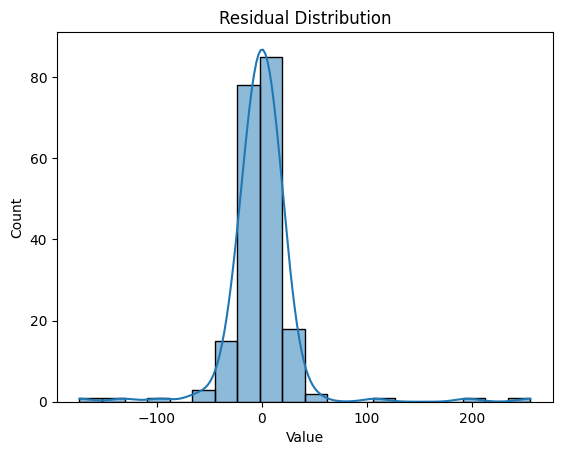

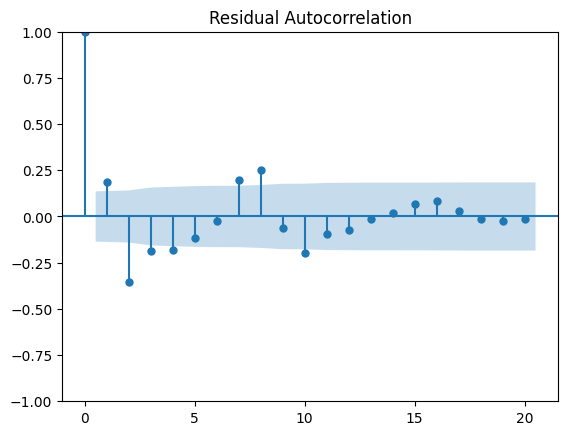

In [29]:
import seaborn as sns

# Compute residuals (errors)
residuals = data["Value"] - y_pred

# Plot residual distribution
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Distribution")

# Check residual autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20)
plt.title("Residual Autocorrelation")

plt.show()


In [ ]:
# Set Date as Index
data.set_index("Date", inplace=True)

# Plot observed values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Value"], label="Observed Exchange Rate", color="blue", linewidth=2, linestyle="-")

# Formatting the X-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Year-Month format
plt.xticks(rotation=45)  # Rotate dates for readability

# Improve legend and title
plt.legend(fontsize=12)
plt.title("Exchange Rate Trend (NGN-USD)", fontsize=14, fontweight="bold")

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

In [ ]:
# Generate future dates for forecast
future_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq="M")[1:]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot observed values
plt.plot(data.index, data["Value"], label="Observed Exchange Rate", color="blue", linewidth=2, linestyle="-")

# Plot forecasted values
plt.plot(future_dates, y_forecast_original, label="Forecasted Exchange Rate", color="red", linewidth=2, linestyle="--")

# Formatting the X-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Year-Month format
plt.xticks(rotation=45)  # Rotate dates for better readability

# Improve legend and title
plt.legend(fontsize=12)
plt.title("Exchange Rate Forecast using TBATS", fontsize=14, fontweight="bold")

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()
